# Read with Matplotlib

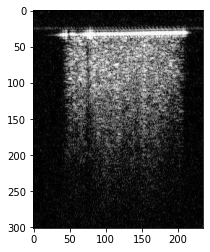

In [5]:
# From https://www.geeksforgeeks.org/reading-images-in-python/

# Python program to read  
# image using matplotlib 
  
# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/1_k1_cortex.jpg', format = "jpg") 
  
# Output Images 
plt.imshow(img) 

In [6]:
img.shape

(301, 235, 3)

In [9]:
type(img)

numpy.ndarray

In [7]:
img[60,60,:]

array([157, 157, 157], dtype=uint8)

The values in the three channels repeat

# Reading the whole directory

In [17]:
import numpy as np

In [18]:
import os, sys

# Open a file
path = "/work/omicsbio/paulcalle/Kidney_project/images/"
dirs = os.listdir( path )

# It will get the directories with the full directory name
l_folders = [] 
# This would print all directories
for item in dirs:
    temp_dir = path + item
    if os.path.isdir(temp_dir):
        subdirs = os.listdir(temp_dir)
        for subitem in subdirs:
            l_folders.append(temp_dir + "/" +subitem)
            print(subitem)

k7_medulla
k7_cortex
k7_pelvis_calyx
k4_medulla
k4_pelvis_calyx
k4_cortex
k9_pelvis_calyx
k9_medulla
k9_cortex
k3_medulla
k3_pelvis_calyx
k3_cortex
k10_medulla
k10_pelvis_calyx
k10_cortex
k1_cortex
k1_medulla
k1_pelvis_calyx
k6_medulla
k6_cortex
k6_pelvis_calyx
k2_medulla
k2_pelvis_calyx
k2_cortex
k8_pelvis_calyx
k8_cortex
k8_medulla
k5_cortex
k5_pelvis_calyx
k5_medulla


In [19]:
dirs

['k7', 'k4', 'k9', 'k3', 'k10', 'k1', 'k6', 'k2', 'k8', 'k5']

In [20]:
l_folders

['/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla',
 '/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex',
 '/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx',
 '/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla',
 '/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx',
 '/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex',
 '/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx',
 '/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla',
 '/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex',
 '/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla',
 '/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx',
 '/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex',
 '/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla',
 '/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx',
 '/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex',

In [21]:
# l_name_files stores the name of the files
l_name_files = []
# l_images stores the images in a numpy ndarray format
l_images = []

for item in l_folders:
    file_dir_temp = os.listdir( item )
    print(file_dir_temp)
    for item_list in file_dir_temp:
        path_img = item + "/" + item_list
        print(path_img)
        img = mpimg.imread(path_img, format = "jpg")
#         plt.imshow(img)
        l_images.append(img)
        l_name_files.append(item_list)
#         break

['344_k7_medulla.jpg', '451_k7_medulla.jpg', '995_k7_medulla.jpg', '828_k7_medulla.jpg', '836_k7_medulla.jpg', '705_k7_medulla.jpg', '556_k7_medulla.jpg', '68_k7_medulla.jpg', '548_k7_medulla.jpg', '76_k7_medulla.jpg', '602_k7_medulla.jpg', '931_k7_medulla.jpg', '892_k7_medulla.jpg', '109_k7_medulla.jpg', '117_k7_medulla.jpg', '243_k7_medulla.jpg', '412_k7_medulla.jpg', '91_k7_medulla.jpg', '758_k7_medulla.jpg', '746_k7_medulla.jpg', '875_k7_medulla.jpg', '307_k7_medulla.jpg', '319_k7_medulla.jpg', '154_k7_medulla.jpg', '200_k7_medulla.jpg', '515_k7_medulla.jpg', '35_k7_medulla.jpg', '972_k7_medulla.jpg', '641_k7_medulla.jpg', '684_k7_medulla.jpg', '739_k7_medulla.jpg', '727_k7_medulla.jpg', '814_k7_medulla.jpg', '473_k7_medulla.jpg', '366_k7_medulla.jpg', '378_k7_medulla.jpg', '191_k7_medulla.jpg', '261_k7_medulla.jpg', '135_k7_medulla.jpg', '913_k7_medulla.jpg', '620_k7_medulla.jpg', '783_k7_medulla.jpg', '8_k7_medulla.jpg', '574_k7_medulla.jpg', '54_k7_medulla.jpg', '298_k7_medulla.

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/556_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/68_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/548_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/76_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/602_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/931_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/892_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/109_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/117_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/243_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/412_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/91_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/ima

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/278_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/53_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/573_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/784_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/639_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/627_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/914_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/474_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/813_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/720_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/683_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/196_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/217_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/209_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/310_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/405_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/86_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/98_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/751_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/862_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/870_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/743_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/409_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/94_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/ima

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/661_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/952_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/496_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/15_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/535_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/488_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/220_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/383_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/174_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/339_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/284_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/327_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/960_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/519_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/27_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/507_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/39_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/212_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/146_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/158_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/315_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/867_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/754_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/879_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/59_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/567_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/790_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/900_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/633_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/126_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/138_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/272_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/182_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/375_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/460_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/734_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/75_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/555_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/891_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/932_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/601_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/114_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/240_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/359_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/347_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/452_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/706_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/988_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/355_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/252_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/118_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/106_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/613_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/920_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/883_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/547_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/79_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/559_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/67_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/795_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/380_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/223_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/169_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/177_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/206_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/218_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/152_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/659_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/974_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/647_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/33_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla/513_k7_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/782_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/662_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/1_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/246_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/150_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/617_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/501_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/806_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/30_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/125_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/918_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/233_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/709_k7_

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/921_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/730_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/426_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/295_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/375_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/68_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/183_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/559_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/447_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/751_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/96_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/940_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/300_k7

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/712_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/357_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/773_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/693_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/585_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/465_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/249_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/962_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/882_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/618_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/322_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/809_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/917_

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/582_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/885_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/965_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/158_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/331_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/904_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/139_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/403_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/715_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/59_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/344_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/488_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/568_k

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/250_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/146_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/307_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/219_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/932_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/723_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/435_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/372_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/1000_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/292_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/184_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/859_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/648

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/282_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/658_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/746_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/450_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/957_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/81_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/639_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/303_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/828_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/936_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/431_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/727_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/180_k

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/949_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/174_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/519_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/28_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/335_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/900_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/711_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/407_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/340_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/472_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/592_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/684_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/764_k

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/702_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/414_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/347_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/595_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/475_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/763_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/683_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/972_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/892_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/259_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/608_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/819_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/332_

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/755_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/443_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/92_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/944_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/179_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/528_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/304_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/19_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/931_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/436_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/720_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/193_k7_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex/78_k7_

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/429_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/434_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/393_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/576_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/52_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/117_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/980_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/299_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/461_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/523_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/284_k7_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/297_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/530_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/14_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/151_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/227_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/580_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/365_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/704_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/646_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/923_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/861_k7_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/170_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/795_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/453_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/511_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/559_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/138_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/682_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/125_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/60_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/406_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/544_k7_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/533_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/294_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/471_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/289_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/990_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/465_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/527_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/280_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/146_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/999_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/984_k7_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/769_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/811_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/774_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/636_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/191_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/257_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/315_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/512_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/450_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/796_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/173_k7_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/34_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/171_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/794_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/452_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/510_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/789_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/29_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/124_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/683_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/61_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/407_k7_pelvis_calyx.jpg
/work/omicsbi

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/421_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/882_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/269_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/832_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/970_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/608_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/615_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/757_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/336_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/491_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/274_k7_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/39_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/799_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/500_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/442_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/784_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/24_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/161_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/129_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/548_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/555_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/417_k7_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/772_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/817_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/955_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/346_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/204_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/665_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/87_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/727_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/842_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/678_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/900_k7_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/701_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/643_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/926_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/864_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/598_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/438_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/886_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/43_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/106_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/567_k7_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx/382_k7_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/258_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/112_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/19_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/897_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/619_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/934_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/607_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/889_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/553_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/700_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/833_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/990_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/339_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/284_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/383_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/220_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/174_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/661_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/952_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/61_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/535_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/488_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/496_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/274_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/348_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/987_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/709_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/717_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/999_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/824_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/443_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/10_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/923_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/610_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/880_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/544_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/322_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/281_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/171_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/386_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/398_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/225_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/530_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/493_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/957_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/664_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/949_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/64_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/629_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/794_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/37_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/29_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/563_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/332_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/291_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/840_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/773_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/439_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/584_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/427_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/199_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/187_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/269_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/277_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/123_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/36_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/28_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/636_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/905_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/795_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/628_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/562_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/528_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/495_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/536_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/765_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/856_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/848_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/431_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/592_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/287_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/324_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/299_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/301_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/542_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/16_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/886_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/608_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/925_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/616_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/898_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/103_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/257_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/249_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/350_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/445_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/552_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/832_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/701_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/991_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/455_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/340_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/172_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/226_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/385_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/238_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/490_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla/533_k4_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/973_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/616_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/754_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/22_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/335_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/492_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/277_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/598_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/864_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/926_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/643_k4_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/712_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/64_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/373_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/596_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/231_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/147_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/998_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/526_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/281_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/464_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/479_k4_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/417_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/555_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/548_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/129_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/58_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/856_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/914_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/352_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/210_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/671_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/909_k4_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/595_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/370_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/869_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/67_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/711_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/1_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/653_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/936_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/874_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/588_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/647_k4_pelvis_calyx.jpg
/work/omicsbi

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/620_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/14_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/762_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/807_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/945_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/356_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/214_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/675_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/737_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/41_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/852_k4_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/459_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/506_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/444_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/782_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/167_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/760_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/16_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/818_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/185_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/622_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/243_k4_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/774_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/769_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/811_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/953_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/308_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/173_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/796_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/450_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/512_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/418_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/681_k4_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/489_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/529_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/997_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/148_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/155_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/534_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/293_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/476_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/399_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/880_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/93_k4_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/122_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/401_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/543_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/698_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/177_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/792_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/454_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/516_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/449_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/502_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/440_k4_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/704_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/365_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/580_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/227_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/834_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/976_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/613_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/751_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/829_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/27_k4_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx/497_k4_pelvis_calyx.jpg
/work/omics

['449_k4_cortex.jpg', '265_k4_cortex.jpg', '38_k4_cortex.jpg', '385_k4_cortex.jpg', '173_k4_cortex.jpg', '850_k4_cortex.jpg', '557_k4_cortex.jpg', '641_k4_cortex.jpg', '106_k4_cortex.jpg', '210_k4_cortex.jpg', '634_k4_cortex.jpg', '522_k4_cortex.jpg', '825_k4_cortex.jpg', '391_k4_cortex.jpg', '271_k4_cortex.jpg', '167_k4_cortex.jpg', '844_k4_cortex.jpg', '199_k4_cortex.jpg', '543_k4_cortex.jpg', '655_k4_cortex.jpg', '112_k4_cortex.jpg', '59_k4_cortex.jpg', '204_k4_cortex.jpg', '428_k4_cortex.jpg', '4_k4_cortex.jpg', '620_k4_cortex.jpg', '536_k4_cortex.jpg', '831_k4_cortex.jpg', '581_k4_cortex.jpg', '461_k4_cortex.jpg', '777_k4_cortex.jpg', '697_k4_cortex.jpg', '966_k4_cortex.jpg', '886_k4_cortex.jpg', '10_k4_cortex.jpg', '353_k4_cortex.jpg', '878_k4_cortex.jpg', '998_k4_cortex.jpg', '669_k4_cortex.jpg', '789_k4_cortex.jpg', '65_k4_cortex.jpg', '238_k4_cortex.jpg', '913_k4_cortex.jpg', '702_k4_cortex.jpg', '414_k4_cortex.jpg', '326_k4_cortex.jpg', '475_k4_cortex.jpg', '595_k4_cortex.jpg

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/199_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/543_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/655_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/112_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/59_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/204_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/428_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/4_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/620_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/536_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/831_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/581_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/461_k4_

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/359_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/992_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/872_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/783_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/663_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/575_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/495_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/232_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/124_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/919_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/708_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/500_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/616_

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/374_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/558_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/109_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/934_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/42_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/433_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/725_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/301_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/221_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/137_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/513_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/605_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/814_k

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/858_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/373_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/293_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/649_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/927_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/51_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/420_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/736_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/628_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/312_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/839_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/743_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/455_k

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/846_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/541_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/657_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/67_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/911_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/700_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/416_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/508_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/99_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/324_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/463_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/583_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/695_k4

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/691_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/587_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/467_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/16_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/960_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/880_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/355_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/499_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/579_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/127_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/231_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/615_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/503_k

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/195_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/848_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/659_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/41_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/937_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/726_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/430_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/638_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/829_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/302_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/445_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/753_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/942_k

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/131_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/227_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/603_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/515_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/84_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/339_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/812_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/442_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/754_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/945_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/178_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/33_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/370_k4

/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/696_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/776_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/460_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/580_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/11_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/887_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/967_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/999_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/879_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/352_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/788_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/668_k4_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_cortex/912_k

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/955_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/948_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/630_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/197_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/772_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/313_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/251_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/219_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/842_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/678_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/900_k9_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/154_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/477_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/535_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/292_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/528_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/996_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/21_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/149_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/101_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/69_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/422_k9_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/82_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/935_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/877_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/712_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/650_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/928_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/231_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/596_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/373_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/574_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/436_k9_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/661_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/919_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/723_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/342_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/200_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/846_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/904_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/634_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/193_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/776_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/317_k9_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/144_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/64_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/891_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/388_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/570_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/432_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/395_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/111_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/79_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/579_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/885_k9_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/933_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/368_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/320_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/487_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/262_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/603_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/741_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/839_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/824_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/966_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/478_k9_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/353_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/732_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/670_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/908_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/915_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/857_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/244_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/306_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/767_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/182_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/625_k9_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/515_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/174_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/791_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/949_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/196_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/631_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/773_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/312_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/250_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/816_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/954_k9_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/261_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/484_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/323_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/283_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/524_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/466_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/145_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/30_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/987_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/158_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/539_k9_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/905_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/660_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/918_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/722_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/343_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/201_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/249_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/812_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/950_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/628_k9_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_pelvis_calyx/192_k9_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/35_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/230_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/393_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/91_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/164_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/942_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/671_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/486_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/498_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/525_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/374_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/76_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/ima

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/710_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/444_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/351_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/53_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/967_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/654_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/979_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/500_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/215_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/141_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/312_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/10_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/596_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/435_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/588_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/264_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/130_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/625_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/916_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/798_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/786_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/908_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/571_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/681_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/368_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/74_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/181_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/729_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/694_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/804_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/737_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/463_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/505_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/651_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/962_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/144_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/875_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/412_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/307_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/319_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/135_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/261_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/574_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/913_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/620_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/783_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/473_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/684_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/815_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/726_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/65_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/190_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/367_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/379_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/536_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/528_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/495_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/951_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/662_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/169_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/757_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/864_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/118_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/106_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/252_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/547_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/559_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/613_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/920_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/883_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/440_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/984_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/469_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/477_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/362_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/195_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/60_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/844_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/777_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/769_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/423_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/580_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/328_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/295_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/542_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/981_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/711_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/822_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/445_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/350_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/52_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/655_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/966_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/978_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/501_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_medulla/214_k9_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/893_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/973_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/609_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/333_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/818_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/11_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/906_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/401_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/717_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/879_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/999_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/70_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/352_k9

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/200_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/116_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/364_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/284_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/46_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/192_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/548_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/456_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/740_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/951_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/33_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/311_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/924_k9

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/726_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/430_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/377_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/297_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/181_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/55_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/445_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/753_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/942_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/269_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/389_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/34_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/316_k9

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/89_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/960_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/518_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/334_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/16_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/901_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/406_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/710_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/63_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/341_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/4_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/765_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/685_k9_co

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/416_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/351_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/73_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/583_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/463_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/775_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/695_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/964_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/159_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/884_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/622_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/534_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/318_k

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/147_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/93_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/251_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/502_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/614_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/805_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/230_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/126_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/990_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/79_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/870_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/781_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/661_k9

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/505_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/613_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/802_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/329_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/237_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/121_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/348_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/983_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/863_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/792_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/672_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/564_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/484_

/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/841_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/546_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/650_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/458_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/274_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/394_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/162_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/625_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/533_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/834_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/117_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/201_k9_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k9/k9_cortex/347_

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/619_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/897_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/934_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/16_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/889_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/607_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/112_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/246_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/258_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/417_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/409_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/870_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/97_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/725_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/89_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/698_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/816_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/193_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/364_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/598_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/425_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/586_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/842_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/771_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/610_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/880_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/443_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/709_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/987_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/999_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/717_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/824_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/356_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/348_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/507_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/519_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/278_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/266_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/132_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/627_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/36_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/914_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/784_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/28_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/639_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/573_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/92_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/683_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/ima

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/904_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/637_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/629_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/38_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/794_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/122_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/268_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/276_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/198_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/186_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/371_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/464_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/160_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/397_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/389_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/234_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/521_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/482_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/64_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/946_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/675_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/958_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/585_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/438_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/782_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/621_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/30_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/912_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/550_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/604_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/15_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/937_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/929_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/894_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/111_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/245_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/445_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/350_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/257_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/249_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/103_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/608_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/886_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/19_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/925_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/898_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/616_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/542_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/570_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/282_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/321_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/853_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/760_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/589_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/434_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/597_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/68_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/679_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/667_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_medulla/954_k3_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/571_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/110_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/158_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/94_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/987_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/539_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/466_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/524_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/283_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/145_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/89_k3_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/475_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/290_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/537_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/989_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/156_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/220_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/587_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/362_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/703_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/939_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/641_k3_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/725_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/738_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/840_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/11_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/902_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/359_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/311_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/253_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/59_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/195_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/632_k3_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/880_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/155_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/99_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/534_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/293_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/476_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/529_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/148_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/997_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/84_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/462_k3_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/196_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/949_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/250_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/312_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/515_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/457_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/791_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/174_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/169_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/508_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/540_k3_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/814_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/45_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/956_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/189_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/310_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/252_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/58_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/633_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/194_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/809_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/771_k3_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/79_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/612_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/828_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/750_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/331_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/496_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/273_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/5_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/379_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/718_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/860_k3_pelvis_calyx.jpg
/work/omicsbi

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/235_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/458_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/507_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/445_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/783_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/166_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/689_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/552_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/410_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/133_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/694_k3_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/546_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/172_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/797_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/451_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/513_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/892_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/112_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/573_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/431_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/396_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/479_k3_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/154_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/98_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/292_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/535_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/477_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/643_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/28_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/701_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/879_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/360_k3_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_pelvis_calyx/222_k3_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/450_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/746_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/957_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/639_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/828_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/303_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/936_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/727_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/431_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/376_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/296_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/180_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/84_k

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/711_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/340_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/764_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/684_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/592_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/472_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/148_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/975_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/895_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/321_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/129_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/914_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/413_

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/318_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/206_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/110_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/14_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/846_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/657_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/541_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/749_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/61_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/165_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/958_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/273_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/393_k3

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/755_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/944_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/179_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/528_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/304_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/931_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/720_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/436_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/365_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/285_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/193_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/97_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/549_k

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/281_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/361_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/745_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/453_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/169_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/954_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/538_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/314_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/18_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/921_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/426_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/730_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/183_k

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/796_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/676_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/560_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/480_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/688_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/768_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/899_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/40_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/144_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/979_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/252_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/515_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/603_k

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/462_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/774_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/694_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/965_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/158_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/885_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/331_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/904_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/139_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/715_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/403_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/344_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/568_

/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/307_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/932_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/219_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/435_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/723_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/80_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/859_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/184_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/292_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/372_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/648_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/756_k3_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k3/k3_cortex/440_k

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/60_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/638_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/89_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/232_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/715_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/895_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/510_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/843_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/125_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/402_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/607_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/320_k10_medulla.jpg
/work/

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/372_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/177_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/450_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/498_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/156_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/471_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/674_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/353_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/830_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/759_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/297_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/241_k10_medulla.jpg
/wor

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/810_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/779_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/595_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/940_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/629_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/71_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/98_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/501_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/704_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/223_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/884_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/852_k10_medulla.jpg
/work/

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/783_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/360_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/647_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/389_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/442_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/165_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/678_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/20_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/911_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/691_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/494_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/1000_k10_medulla.jpg
/wor

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/210_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/737_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/532_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/138_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/42_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/973_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/107_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/420_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/625_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/302_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/94_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/708_k10_medulla.jpg
/work/

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/417_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/130_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/992_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/335_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/612_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/428_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/75_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/944_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/880_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/869_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/700_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/227_k10_medulla.jpg
/work

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/437_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/632_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/315_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/83_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/567_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/245_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/762_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/381_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/368_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/17_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/926_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/184_k10_medulla.jpg
/work/

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/509_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/865_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/536_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/214_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/733_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/977_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/339_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/46_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/827_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/269_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/280_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/141_k10_medulla.jpg
/work

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/249_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/582_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/446_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/161_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/188_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/364_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/643_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/345_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/662_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/467_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/140_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/268_k10_medulla.jpg
/wor

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/966_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/328_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/57_k10_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_medulla/4_k10_medulla.jpg
['2_k10_pelvis_calyx.jpg', '849_k10_pelvis_calyx.jpg', '520_k10_pelvis_calyx.jpg', '457_k10_pelvis_calyx.jpg', '756_k10_pelvis_calyx.jpg', '621_k10_pelvis_calyx.jpg', '79_k10_pelvis_calyx.jpg', '349_k10_pelvis_calyx.jpg', '822_k10_pelvis_calyx.jpg', '154_k10_pelvis_calyx.jpg', '955_k10_pelvis_calyx.jpg', '322_k10_pelvis_calyx.jpg', '255_k10_pelvis_calyx.jpg', '12_k10_pelvis_calyx.jpg', '650_k10_pelvis_calyx.jpg', '727_k10_pelvis_calyx.jpg', '338_k10_pelvis_calyx.jpg', '838_k10_pelvis_calyx.jpg', '90_k10_pelvis_calyx.jpg', '426_k10_pelvis_calyx.jpg', '551_k10_pelvis_calyx.jpg', '224_k10_pelvis_calyx.jpg', '353_k10_pelvis_calyx.jpg', '63_k10_pelvis_calyx.jpg', '924

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/322_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/255_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/12_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/650_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/727_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/338_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/838_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/90_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/426_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/551_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/224_

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/796_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/811_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/167_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/562_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/393_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/415_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/714_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/893_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/663_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/509_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/86

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/933_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/258_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/730_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/647_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/546_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/431_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/87_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/958_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/159_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/942_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/835

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/892_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/715_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/662_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/563_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/392_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/414_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/51_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/609_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/361_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/590_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/216

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/961_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/316_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/261_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/490_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/26_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/709_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/514_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/463_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/292_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/762_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/193

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/794_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/264_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/495_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/313_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/23_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/878_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/688_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/466_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/297_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/511_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/997

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/851_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/226_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/351_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/61_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/639_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/92_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/424_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/553_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/652_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/725_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/555_

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/54_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/213_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/364_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/595_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/694_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/913_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/864_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/112_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/517_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/291_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/460

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/879_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/689_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/638_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/60_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/227_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/350_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/927_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/126_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/850_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/539_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/653

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/738_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/17_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/722_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/655_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/95_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/554_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/423_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/356_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/221_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/66_k10_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_pelvis_calyx/749_k

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/101_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/255_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/352_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/447_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/54_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/459_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/820_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/713_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/983_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/142_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/216_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/208_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidn

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/565_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/631_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/902_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/792_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/170_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/399_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/224_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/387_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/492_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/81_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/531_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/948_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidn

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/603_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/930_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/893_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/306_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/318_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/413_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/759_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/747_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/874_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/514_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/973_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/640_k10_cortex.jpg
/work/omicsbio/paulcalle/Kid

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/655_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/978_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/690_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/733_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/800_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/479_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/74_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/467_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/372_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/185_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/275_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/121_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidn

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/533_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/490_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/83_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/954_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/667_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/679_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/195_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/362_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/469_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/477_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/64_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/680_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidne

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/305_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/410_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/877_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/744_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/869_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/38_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/596_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/26_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/588_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/435_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/852_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/761_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidne

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/776_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/768_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/127_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/139_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/273_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/578_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/566_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/791_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/901_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/632_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/72_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/461_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidn

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/813_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/683_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/658_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/975_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/646_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/512_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/207_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/219_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/153_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/300_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/9_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/741_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidne

/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/209_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/502_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/648_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/656_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/965_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/16_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/405_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/862_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/751_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/7_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/310_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k10/k10_cortex/276_k10_cortex.jpg
/work/omicsbio/paulcalle/Kidney

['704_k1_cortex.jpg', '412_k1_cortex.jpg', '128_k1_cortex.jpg', '915_k1_cortex.jpg', '320_k1_cortex.jpg', '880_k1_cortex.jpg', '960_k1_cortex.jpg', '467_k1_cortex.jpg', '587_k1_cortex.jpg', '691_k1_cortex.jpg', '771_k1_cortex.jpg', '579_k1_cortex.jpg', '499_k1_cortex.jpg', '355_k1_cortex.jpg', '59_k1_cortex.jpg', '710_k1_cortex.jpg', '406_k1_cortex.jpg', '901_k1_cortex.jpg', '334_k1_cortex.jpg', '38_k1_cortex.jpg', '518_k1_cortex.jpg', '149_k1_cortex.jpg', '974_k1_cortex.jpg', '894_k1_cortex.jpg', '593_k1_cortex.jpg', '473_k1_cortex.jpg', '765_k1_cortex.jpg', '685_k1_cortex.jpg', '341_k1_cortex.jpg', '100_k1_cortex.jpg', '216_k1_cortex.jpg', '308_k1_cortex.jpg', '823_k1_cortex.jpg', '632_k1_cortex.jpg', '524_k1_cortex.jpg', '383_k1_cortex.jpg', '263_k1_cortex.jpg', '948_k1_cortex.jpg', '175_k1_cortex.jpg', '759_k1_cortex.jpg', '551_k1_cortex.jpg', '647_k1_cortex.jpg', '856_k1_cortex.jpg', '71_k1_cortex.jpg', '738_k1_cortex.jpg', '929_k1_cortex.jpg', '114_k1_cortex.jpg', '202_k1_cortex.

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/355_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/59_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/710_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/406_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/901_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/334_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/38_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/518_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/149_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/974_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/894_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/593_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/473_k1

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/302_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/829_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/638_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/269_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/85_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/389_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/942_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/753_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/445_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/181_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/377_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/297_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/424_k

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/468_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/660_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/780_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/496_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/576_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/56_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/871_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/991_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/96_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/951_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/740_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/456_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/548_k1

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/787_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/667_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/571_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/491_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/51_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/996_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/876_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/236_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/120_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/803_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/24_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/7_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/328_k1_c

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/903_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/336_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/261_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/381_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/177_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/553_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/645_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/189_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/854_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/73_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/438_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/102_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/214_k

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/414_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/702_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/913_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/238_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/9_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/326_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/167_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/271_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/391_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/655_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/543_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/63_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/199_k1_

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/755_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/371_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/291_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/187_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/720_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/436_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/931_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/304_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/528_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/253_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/898_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/145_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/978_

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/936_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/828_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/303_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/639_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/943_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/388_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/84_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/268_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/444_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/752_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/296_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/376_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/180_k

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/171_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/267_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/387_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/643_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/555_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/379_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/299_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/75_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/852_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/413_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/705_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/129_k1_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/914_k

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/81_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/324_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/299_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/431_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/592_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/765_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/856_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/848_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/528_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/495_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/536_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/951_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/993_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/830_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/703_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/152_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/218_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/206_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/513_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/974_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/647_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/659_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/414_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/740_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/447_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/352_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/160_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/397_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/389_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/234_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/32_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/521_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/482_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/946_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/675_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/958_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/569_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/623_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/910_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/780_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/470_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/687_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/809_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/817_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/699_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/724_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/192_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/365_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/442_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/986_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/708_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/825_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/716_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/998_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/357_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/349_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/506_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/518_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/961_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/652_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/801_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/691_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/561_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/918_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/796_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/788_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/906_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/635_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/120_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/72_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/274_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/105_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/990_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/553_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/619_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/897_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/934_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/889_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/607_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/112_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/40_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/246_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/258_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/417_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/804_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/737_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/729_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/694_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/463_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/793_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/630_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/903_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/564_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/271_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/77_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/69_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/191_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/378_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/366_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/135_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/67_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/261_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/79_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/574_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/783_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/913_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/620_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_medulla/746_k1_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/531_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/296_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/473_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/274_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/336_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/491_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/757_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/615_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/608_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/970_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/832_k1_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/260_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/54_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/498_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/826_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/964_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/159_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/986_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/538_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/467_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/525_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/282_k1_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/778_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/90_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/503_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/441_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/787_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/162_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/409_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/556_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/414_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/690_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/137_k1_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/154_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/535_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/292_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/477_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/528_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/149_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/996_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/101_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/560_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/422_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/385_k1_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/39_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/210_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/909_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/671_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/733_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/803_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/639_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/941_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/258_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/71_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/307_k1_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/853_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/911_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/669_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/208_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/21_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/357_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/215_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/674_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/736_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/696_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/131_k1_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/192_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/635_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/254_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/316_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/229_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/872_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/930_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/648_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/655_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/717_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/376_k1_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/578_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/119_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/884_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/151_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/297_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/530_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/472_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/993_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/609_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/971_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/833_k1_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/638_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/940_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/259_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/70_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/92_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/798_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/160_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/785_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/443_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/501_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/549_k1_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/366_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/707_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/645_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/920_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/658_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/862_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/10_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/239_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/271_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/58_k1_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_pelvis_calyx/494_k1_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/688_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/806_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/735_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/461_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/374_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/183_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/46_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/942_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/671_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/58_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/498_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/525_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/617_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/924_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/543_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/256_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/248_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/102_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/74_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/970_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/643_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/517_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/509_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/202_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/798_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/916_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/2_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/571_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/264_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/130_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/761_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/852_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/435_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/588_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/596_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/283_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/546_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/882_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/921_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/612_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/25_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/107_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/119_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/253_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/402_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/865_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/756_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/748_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/892_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/35_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/602_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/931_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/548_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/556_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/430_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/593_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/857_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/764_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/849_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/286_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/306_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/874_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/747_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/759_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/413_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/69_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/640_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/973_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/77_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/514_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/201_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/155_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/939_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/540_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/255_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/101_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/352_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/983_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/87_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/713_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/820_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/99_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/459_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/447_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/780_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/128_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/136_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/262_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/192_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/365_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/470_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/809_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/687_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/699_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/817_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/724_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/38_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/881_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/104_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/250_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/357_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/349_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/442_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/82_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/708_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/986_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/825_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_medulla/998_k6_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/145_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/253_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/514_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/602_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/813_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/338_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/226_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/130_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/359_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/872_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/992_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/663_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/783_

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/168_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/32_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/539_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/315_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/920_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/427_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/731_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/199_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/844_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/543_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/48_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/655_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/271_k6

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/590_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/470_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/766_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/686_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/977_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/897_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/10_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/337_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/229_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/902_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/713_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/405_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/633_k

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/123_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/419_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/995_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/875_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/784_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/79_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/664_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/572_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/492_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/87_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/156_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/240_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/513_k6

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/225_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/409_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/985_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/865_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/562_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/482_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/69_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/794_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/674_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/97_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/250_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/146_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/615_k6

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/959_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/164_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/272_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/392_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/521_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/637_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/826_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/213_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/938_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/105_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/729_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/298_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/378_

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/116_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/357_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/70_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/773_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/693_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/585_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/465_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/249_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/962_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/882_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/618_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/7_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/322_k6_

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/968_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/612_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/504_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/328_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/803_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/120_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/236_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/862_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/982_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/349_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/485_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/565_k6_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_cortex/673_

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/969_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/753_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/332_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/495_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/270_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/488_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/836_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/974_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/644_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/706_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/367_k6_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/115_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/574_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/56_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/436_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/391_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/509_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/168_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/175_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/790_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/456_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/36_k6_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/1000_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/129_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/548_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/555_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/77_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/417_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/134_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/693_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/799_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/22_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/500_k6_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/102_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/41_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/563_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/386_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/421_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/882_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/988_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/157_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/291_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/536_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/14_k6_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/776_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/846_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/904_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/98_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/342_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/200_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/85_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/919_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/661_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/723_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/517_k6_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/769_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/774_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/636_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/191_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/257_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/315_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/906_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/844_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/721_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/859_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/663_k6_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/887_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/927_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/865_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/599_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/223_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/584_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/361_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/700_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/878_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/642_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/972_k6_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/208_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/911_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/669_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/853_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/763_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/186_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/621_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/959_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/240_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/302_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/5_k6_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/47_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/104_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/899_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/939_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/641_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/703_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/362_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/587_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/220_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/866_k6_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k6/k6_pelvis_calyx/924_k6_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/624_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/799_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/917_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/282_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/321_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/434_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/589_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/597_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/760_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/853_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/490_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/533_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/452_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/718_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/996_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/835_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/988_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/706_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/313_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/406_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/418_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/752_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/861_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/501_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/499_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/524_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/487_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/943_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/670_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/580_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/423_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/769_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/777_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/844_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/336_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/295_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/428_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/436_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/762_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/851_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/937_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/604_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/894_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/929_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/550_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/245_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/111_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/26_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/404_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/750_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/863_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/36_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/28_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/101_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/255_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/540_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/614_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/927_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/939_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/884_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/335_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/51_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/166_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/178_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/232_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/391_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/484_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/539_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/527_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/673_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/940_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/502_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/972_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/84_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/344_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/451_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/1000_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/705_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/836_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/828_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/995_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/548_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/556_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/892_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/771_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/842_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/425_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/598_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/586_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/293_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/330_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/237_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/229_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/394_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/54_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/163_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/596_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/852_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/761_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/491_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/532_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/678_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/666_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/955_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/173_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/44_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/227_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_medulla/384_k2_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

['256_k2_pelvis_calyx.jpg', '314_k2_pelvis_calyx.jpg', '775_k2_pelvis_calyx.jpg', '190_k2_pelvis_calyx.jpg', '637_k2_pelvis_calyx.jpg', '952_k2_pelvis_calyx.jpg', '768_k2_pelvis_calyx.jpg', '810_k2_pelvis_calyx.jpg', '15_k2_pelvis_calyx.jpg', '309_k2_pelvis_calyx.jpg', '203_k2_pelvis_calyx.jpg', '341_k2_pelvis_calyx.jpg', '858_k2_pelvis_calyx.jpg', '720_k2_pelvis_calyx.jpg', '662_k2_pelvis_calyx.jpg', '907_k2_pelvis_calyx.jpg', '40_k2_pelvis_calyx.jpg', '845_k2_pelvis_calyx.jpg', '419_k2_pelvis_calyx.jpg', '680_k2_pelvis_calyx.jpg', '127_k2_pelvis_calyx.jpg', '546_k2_pelvis_calyx.jpg', '404_k2_pelvis_calyx.jpg', '797_k2_pelvis_calyx.jpg', '172_k2_pelvis_calyx.jpg', '513_k2_pelvis_calyx.jpg', '451_k2_pelvis_calyx.jpg', '665_k2_pelvis_calyx.jpg', '727_k2_pelvis_calyx.jpg', '346_k2_pelvis_calyx.jpg', '204_k2_pelvis_calyx.jpg', '219_k2_pelvis_calyx.jpg', '842_k2_pelvis_calyx.jpg', '47_k2_pelvis_calyx.jpg', '678_k2_pelvis_calyx.jpg', '900_k2_pelvis_calyx.jpg', '948_k2_pelvis_calyx.jpg', '63

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/546_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/404_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/797_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/172_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/513_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/451_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/665_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/727_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/346_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/204_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/219_k2_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/585_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/222_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/360_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/598_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/926_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/61_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/864_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/754_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/29_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/616_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/277_k2_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/960_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/618_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/27_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/822_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/97_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/892_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/112_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/396_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/431_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/573_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/479_k2_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/771_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/809_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/194_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/633_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/793_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/176_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/517_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/455_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/448_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/4_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/684_k2_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/896_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/71_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/874_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/936_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/588_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/370_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/595_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/232_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/653_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/869_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/711_k2_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/984_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/21_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/824_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/966_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/320_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/487_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/262_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/603_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/741_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/839_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/871_k2_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/223_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/584_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/361_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/329_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/972_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/748_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/35_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/830_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/755_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/28_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/617_k2_pelvis_calyx.jpg
/work/omicsb

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/954_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/949_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/196_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/631_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/773_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/312_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/250_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/457_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/515_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/174_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/791_k2_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/1000_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/420_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/387_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/103_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/994_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/468_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/537_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/290_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/475_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/156_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/989_k2_pelvis_calyx.jpg
/work/omi

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/201_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/42_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/847_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/905_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/138_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/559_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/406_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/544_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/682_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/125_k2_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_pelvis_calyx/2_k2_pelvis_calyx.jpg
/work/omicsbi

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/401_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/346_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/76_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/594_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/474_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/762_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/88_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/682_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/973_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/893_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/258_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/17_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/327_k2_

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/395_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/163_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/21_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/311_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/119_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/924_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/423_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/735_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/192_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/284_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/364_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/548_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/54_k2

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/699_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/155_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/968_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/888_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/243_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/510_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/606_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/817_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/222_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/134_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/909_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/718_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/349_

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/307_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/932_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/219_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/435_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/723_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/865_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/985_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/674_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/794_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/482_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/562_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/80_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/146_k

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/910_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/701_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/417_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/847_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/540_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/656_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/748_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/392_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/272_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/959_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/164_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/29_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/623_k

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/895_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/519_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/335_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/900_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/407_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/711_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/857_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/646_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/550_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/758_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/174_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/949_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/382_

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/611_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/507_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/800_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/123_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/235_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/419_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/3_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/981_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/861_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/566_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/486_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/790_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/670_k2

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/720_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/436_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/291_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/371_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/187_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/41_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/443_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/755_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/179_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/944_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/602_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/514_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/338_k

/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/878_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/998_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/353_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/669_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/789_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/63_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/777_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/697_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/581_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/461_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/966_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/886_k2_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k2/k2_cortex/536_k

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/253_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/311_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/770_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/808_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/195_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/632_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/188_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/957_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/815_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/449_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/792_k8_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/88_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/976_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/834_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/2_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/704_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/646_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/580_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/227_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/365_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/378_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/923_k8_pelvis_calyx.jpg
/work/omicsbi

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/875_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/937_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/589_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/483_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/324_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/81_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/266_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/607_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/745_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/758_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/820_k8_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/52_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/512_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/450_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/218_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/843_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/679_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/901_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/664_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/726_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/347_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/205_k8_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/361_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/329_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/972_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/748_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/830_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/755_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/617_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/91_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/276_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/493_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/334_k8_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/964_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/826_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/743_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/979_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/601_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/260_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/87_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/485_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/322_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/228_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/649_k8_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/627_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/180_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/765_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/304_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/246_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/855_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/917_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/672_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/848_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/730_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/351_k8_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/477_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/292_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/535_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/75_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/7_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/879_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/701_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/643_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/222_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/585_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/360_k8_pelvis_calyx.jpg
/work/omicsbi

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/541_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/687_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/120_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/256_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/314_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/775_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/637_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/190_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/952_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/768_k8_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_pelvis_calyx/810_k8_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/691_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/771_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/467_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/587_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/579_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/499_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/355_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/412_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/704_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/915_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/128_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/61_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/320_k

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/554_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/298_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/378_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/853_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/729_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/213_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/938_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/105_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/826_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/521_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/637_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/942_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/269_

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/674_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/985_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/865_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/409_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/133_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/225_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/84_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/810_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/601_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/517_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/244_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/152_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/588_k

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/538_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/954_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/169_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/20_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/453_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/745_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/361_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/281_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/197_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/120_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/69_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/236_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/328_k8

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/228_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/89_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/336_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/896_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/976_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/687_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/767_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/471_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/591_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/799_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/679_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/988_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/868_k

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/620_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/9_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/536_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/271_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/391_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/167_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/543_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/655_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/199_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/844_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/106_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/210_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/825_k8

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/986_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/866_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/708_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/232_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/919_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/124_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/807_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/93_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/500_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/616_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/151_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/18_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/247_k8

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/875_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/419_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/235_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/123_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/800_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/94_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/507_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/611_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/142_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/254_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/598_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/478_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/670_k

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/764_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/340_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/711_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/407_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/74_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/900_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/335_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/519_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/262_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/382_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/174_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/949_k8_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_cortex/758_k

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/237_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/163_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/676_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/945_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/668_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/522_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/481_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/44_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/842_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/771_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/586_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/598_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/91_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/54_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/532_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/491_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/955_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/666_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/678_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/173_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/239_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/384_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/227_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/320_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/376_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/368_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/463_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/729_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/694_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/804_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/737_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/651_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/962_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/63_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/505_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/210_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/836_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/705_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/154_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/200_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/515_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/73_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/972_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/641_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/412_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/758_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/746_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/6_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/ima

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/557_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/549_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/31_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/930_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/603_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/893_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/108_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/116_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/242_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/345_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/95_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/450_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/387_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/475_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/721_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/812_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/682_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/197_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/189_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/360_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/133_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/267_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/279_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/572_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/939_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/927_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/614_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/311_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/404_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/863_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/750_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/65_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/503_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/649_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/657_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/964_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/780_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/623_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/910_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/569_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/577_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/11_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/285_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/338_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/326_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/767_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/854_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/779_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/716_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/998_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/986_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/708_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/87_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/99_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/442_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/349_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/357_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/250_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/104_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k8/k8_medulla/881_k8_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/844_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/199_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/428_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/204_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/112_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/831_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/536_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/620_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/173_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/265_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/385_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/449_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/641_

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/405_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/713_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/902_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/229_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/337_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/253_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/978_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/145_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/898_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/769_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/689_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/58_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/481_k

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/558_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/294_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/374_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/182_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/725_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/433_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/14_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/934_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/109_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/301_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/955_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/168_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/1000_

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/589_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/469_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/497_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/577_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/661_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/781_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/870_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/990_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/736_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/420_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/927_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/839_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/312_

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/165_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/273_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/393_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/78_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/749_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/657_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/86_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/541_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/846_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/728_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/19_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/212_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/939_k5_

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/114_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/929_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/202_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/837_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/626_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/530_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/397_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/277_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/161_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/82_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/545_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/653_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/842_k

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/122_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/801_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/506_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/610_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/157_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/241_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/785_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/665_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/573_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/493_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/994_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/874_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/220_

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/361_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/426_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/730_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/921_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/314_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/538_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/899_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/979_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/144_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/252_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/59_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/688_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/768_k

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/336_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/270_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/390_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/166_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/85_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/542_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/654_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/198_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/845_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/429_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/113_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/205_k5_cortex.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_cortex/830_k

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/495_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/332_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/488_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/974_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/836_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/149_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/996_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/528_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/13_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/292_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/535_k5_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/463_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/286_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/521_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/481_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/326_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/264_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/605_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/747_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/822_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/618_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/960_k5_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/804_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/217_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/355_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/734_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/676_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/913_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/729_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/851_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/348_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/96_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/799_k5_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/702_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/938_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/640_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/586_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/221_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/363_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/564_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/381_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/426_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/898_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/105_k5_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/951_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/813_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/248_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/255_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/317_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/776_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/193_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/634_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/794_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/171_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/510_k5_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/677_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/83_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/7_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/844_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/906_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/663_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/721_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/859_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/340_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/202_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/308_k5_pelvis_calyx.jpg
/work/omicsbi

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/709_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/871_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/714_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/656_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/590_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/237_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/375_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/966_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/824_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/839_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/741_k5_pelvis_calyx.jpg
/work/omic

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/792_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/201_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/343_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/722_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/918_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/660_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/905_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/847_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/4_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/80_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/254_k5_pelvis_calyx.jpg
/work/omicsbi

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/103_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/387_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/420_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/562_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/59_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/756_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/614_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/275_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/337_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/490_k5_pelvis_calyx.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_pelvis_calyx/268_k5_pelvis_calyx.jpg
/work/omics

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/47_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/422_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/59_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/581_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/329_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/294_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/337_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/230_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/393_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/164_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/6_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/671_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/imag

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/215_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/141_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/312_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/860_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/753_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/419_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/407_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/62_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/358_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/346_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/707_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/989_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/384_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/239_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/227_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/173_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/320_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/283_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/852_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/761_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/596_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/588_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/50_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/435_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/45_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/420_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/288_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/335_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/296_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/903_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/630_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/793_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/564_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/271_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/125_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/376_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/914_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/627_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/573_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/931_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/602_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/892_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/556_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/548_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/90_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/243_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/109_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/117_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/399_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/224_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/387_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/170_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/812_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/721_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/682_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/475_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/10_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/360_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/197_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/189_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/234_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/389_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/397_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/482_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/521_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/958_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/675_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/946_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/820_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/713_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/983_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/22_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/876_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/868_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/74_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/411_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/304_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/203_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/157_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/149_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/971_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/642_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/508_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/516_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/i

/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/295_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/328_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/336_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/231_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/392_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/7_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/165_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/943_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/670_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/487_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/499_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/images/k5/k5_medulla/524_k5_medulla.jpg
/work/omicsbio/paulcalle/Kidney_project/im

In [22]:
l_name_files

['344_k7_medulla.jpg',
 '451_k7_medulla.jpg',
 '995_k7_medulla.jpg',
 '828_k7_medulla.jpg',
 '836_k7_medulla.jpg',
 '705_k7_medulla.jpg',
 '556_k7_medulla.jpg',
 '68_k7_medulla.jpg',
 '548_k7_medulla.jpg',
 '76_k7_medulla.jpg',
 '602_k7_medulla.jpg',
 '931_k7_medulla.jpg',
 '892_k7_medulla.jpg',
 '109_k7_medulla.jpg',
 '117_k7_medulla.jpg',
 '243_k7_medulla.jpg',
 '412_k7_medulla.jpg',
 '91_k7_medulla.jpg',
 '758_k7_medulla.jpg',
 '746_k7_medulla.jpg',
 '875_k7_medulla.jpg',
 '307_k7_medulla.jpg',
 '319_k7_medulla.jpg',
 '154_k7_medulla.jpg',
 '200_k7_medulla.jpg',
 '515_k7_medulla.jpg',
 '35_k7_medulla.jpg',
 '972_k7_medulla.jpg',
 '641_k7_medulla.jpg',
 '684_k7_medulla.jpg',
 '739_k7_medulla.jpg',
 '727_k7_medulla.jpg',
 '814_k7_medulla.jpg',
 '473_k7_medulla.jpg',
 '366_k7_medulla.jpg',
 '378_k7_medulla.jpg',
 '191_k7_medulla.jpg',
 '261_k7_medulla.jpg',
 '135_k7_medulla.jpg',
 '913_k7_medulla.jpg',
 '620_k7_medulla.jpg',
 '783_k7_medulla.jpg',
 '8_k7_medulla.jpg',
 '574_k7_medulla.

In [24]:
len(l_images)

30000

In [25]:
l_images[20000].shape

(301, 235, 3)

In [26]:
l_name_files[0]

'344_k7_medulla.jpg'

In [27]:
# Since the three channels repeat
# Just using one
l_images_1D = [ item[:,:,0] for item in l_images]

In [28]:
len(l_images_1D)

30000

In [29]:
l_images_1D[0].shape

(301, 235)

In [30]:
# Converting to array
a_images_1D = np.array(l_images_1D)

In [31]:
a_images_1D.shape

(30000, 301, 235)

In [32]:
a_images_1D[0].shape

(301, 235)

# Label the data

In [33]:
l_name_files

['344_k7_medulla.jpg',
 '451_k7_medulla.jpg',
 '995_k7_medulla.jpg',
 '828_k7_medulla.jpg',
 '836_k7_medulla.jpg',
 '705_k7_medulla.jpg',
 '556_k7_medulla.jpg',
 '68_k7_medulla.jpg',
 '548_k7_medulla.jpg',
 '76_k7_medulla.jpg',
 '602_k7_medulla.jpg',
 '931_k7_medulla.jpg',
 '892_k7_medulla.jpg',
 '109_k7_medulla.jpg',
 '117_k7_medulla.jpg',
 '243_k7_medulla.jpg',
 '412_k7_medulla.jpg',
 '91_k7_medulla.jpg',
 '758_k7_medulla.jpg',
 '746_k7_medulla.jpg',
 '875_k7_medulla.jpg',
 '307_k7_medulla.jpg',
 '319_k7_medulla.jpg',
 '154_k7_medulla.jpg',
 '200_k7_medulla.jpg',
 '515_k7_medulla.jpg',
 '35_k7_medulla.jpg',
 '972_k7_medulla.jpg',
 '641_k7_medulla.jpg',
 '684_k7_medulla.jpg',
 '739_k7_medulla.jpg',
 '727_k7_medulla.jpg',
 '814_k7_medulla.jpg',
 '473_k7_medulla.jpg',
 '366_k7_medulla.jpg',
 '378_k7_medulla.jpg',
 '191_k7_medulla.jpg',
 '261_k7_medulla.jpg',
 '135_k7_medulla.jpg',
 '913_k7_medulla.jpg',
 '620_k7_medulla.jpg',
 '783_k7_medulla.jpg',
 '8_k7_medulla.jpg',
 '574_k7_medulla.

In [34]:
import re

l_label = []

for item in l_name_files:

    if "cortex" in item:
        l_label.append("cortex")
    elif "medulla" in item:
        l_label.append("medulla")
    elif "pelvis" in item:
        l_label.append("pelvis_calyx")
    
#     break
#
    
    # $list(filter(lambda v: re.match('rs', v), l_sample))

In [35]:
a_label = np.array(l_label)

In [36]:
a_label

array(['medulla', 'medulla', 'medulla', ..., 'medulla', 'medulla',
       'medulla'], dtype='<U12')

In [37]:
dict_count = {}
dict_count["medulla"] = 0
dict_count["cortex"] = 0
dict_count["pelvis_calyx"] = 0

for item in a_label:
    if item == "medulla":
        dict_count["medulla"] += 1
    elif item == "cortex":
        dict_count["cortex"] += 1
    if item == "pelvis_calyx":
        dict_count["pelvis_calyx"] += 1


In [38]:
dict_count

{'medulla': 10000, 'cortex': 10000, 'pelvis_calyx': 10000}

# Get kidney number

In [44]:
l_name_files

l_kidney_num = []

r = re.compile(r'(?<=k)[0-9]+')

for item in l_name_files:

    res = r.search(item)   
    l_kidney_num.append(int(res.group(0)))

In [45]:
a_kidney_num = np.array(l_kidney_num)

In [46]:
a_kidney_num.shape

(30000,)

In [48]:
a_kidney_num[10000]

3

# Saving as binaries

In [55]:
with open('/scratch/paulcalle/kidney_data/a_images_1D.npy', 'wb') as f:
    np.save(f, a_images_1D)

In [58]:
with open('/scratch/paulcalle/kidney_data/a_label.npy', 'wb') as f:
    np.save(f, a_label)

In [154]:
with open('/scratch/paulcalle/kidney_data/a_kidney_num.npy', 'wb') as f:
    np.save(f, a_kidney_num)

In [ ]:
a_kidney_num